# EEG for Parkinson Disease 




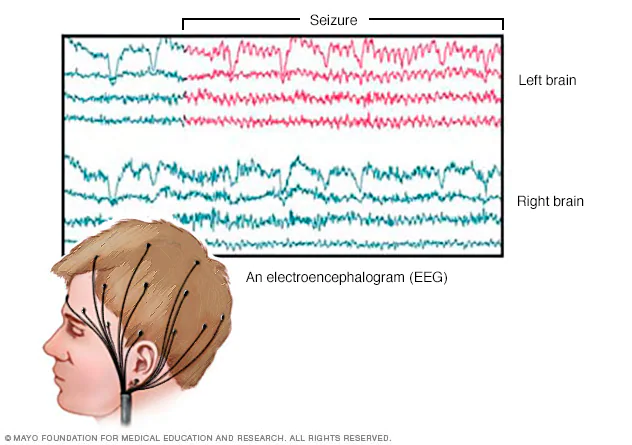
[Source](https://www.mayoclinic.org/tests-procedures/eeg/about/pac-20393875)

## Table of Contents

<div style="margin-top: 20px">

1. [The Dataset:UC San Diego Resting State EEG Data from Patients with Parkinson's Disease](#0)<br>

   1.1 [Loading and Preprocessing the Data](#1)<br>
   1.2 [Concatenate into single object](#2) <br>
   1.3 [Epoch](#3) <br>
    
2\. [Visualizing the data](#4) <br>
3\. [Common Spatial Analysis CSP for Feature Extraction](#5) <br>
4\. [Modeling & Parameter Hypertuning](#6)<br>
5\. [References](#8)<br>
</div>


In [1]:
import matplotlib
import pathlib
import copy 
import mne
import mne_bids
import numpy as np
# %matplotlib qt
matplotlib.use('Qt5Agg')
import os

## The Dataset:UC San Diego Resting State EEG Data from Patients with Parkinson's Disease<a id="0"></a>

#### Data source: <a href="https://openneuro.org/datasets/ds002778">Here</a> 



### Loading and Preprocessing the Data<a id="1"></a>


In [2]:
files = os.listdir(r"\UC_BID")

hc = []
for file in files:
    if "hc" in str(file):
        hc.append(file.split("-")[1])
    

pd = []
for file in files:
    if "pd" in str(file):
        pd.append(file.split("-")[1])


As the Dataset stored in BID data sructure, I am using `mne_bids` from MNE library to read it
> [*The Brain Imaging Data Structure (BIDS)*](https://en.wikipedia.org/wiki/Brain_Imaging_Data_Structure#:~:text=The%20Brain%20Imaging%20Data%20Structure,metadata%20files%20with%20controlled%20vocabulary.) is a standard for organizing, annotating, and describing data collected during neuroimaging experiments. It is based on a formalized file/folder structure and JSON based metadata files with controlled vocabulary.

#### Steps:-
A. Loading the subjects one by one <br>
B. Segmenting the recordings to exactly 3 minutes long <br>
C. Removing redundant Channels => `['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']` <br>
D. Filtering to remove noise

In [3]:
raws = []
events_g = []
count = 1


for hc0 , pd0 in zip(hc,pd):
    
    hc_session = (hc0 ,"hc" ) 
    off_session = (pd0 ,"off" ) 
    sessions = [hc_session ,off_session]
    for session in sessions:
        bids_root = pathlib.Path(r'\UC_BID')
        bids_path = mne_bids.BIDSPath(subject=session[0],
                                      session=session[1],
                                      task='rest',
                              
                                      datatype='eeg',
                                      root=bids_root)
        raw = mne_bids.read_raw_bids(bids_path)
        
        
        
        # To Start from on set event
        tmin = 0 
        events, event_id = mne.events_from_annotations(raw)
        if events.shape[0] == 2 and "1" in event_id :
            tmin = events[1][0] * 0.001
        elif events.shape[0] == 1 and "1" in event_id:
            tmin = events[0][0] * 0.001    
        raw.crop(tmin = tmin)
        
        
        
        # only 3 miutes for each sample
        tmax = 180.
        raw.crop(tmax = tmax)
        
        
        
        # Excluding EXG Channels
        raw.pick_types(eeg=True, exclude=['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8'])
        
        
        
        # Filtering
        raw.load_data().filter(l_freq = 0.5,h_freq=30)
       
    
        #creating Stamps for events
        ev = 92160 * count
        if (session[1] == 'hc'):
            events_g.append([ev , 0 , 0])

            
        elif (session[1] == 'off'):
            events_g.append([ev , 0 , 1])
        
        raws.append(raw)
        count += 1
        
        
        
    


Extracting EDF parameters from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc1\ses-hc\eeg\sub-hc1_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc1\ses-hc\eeg\sub-hc1_ses-hc_task-rest_events.tsv.
Reading channel info from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc1\ses-hc\eeg\sub-hc1_ses-hc_task-rest_channels.tsv.
Used Annotations descriptions: ['1', '65536']
Reading 0 ... 92160  =      0.000 ...   180.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwid

- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)

Extracting EDF parameters from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-pd14\ses-off\eeg\sub-pd14_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-pd14\ses-off\eeg\sub-pd14_ses-off_task-rest_events.tsv.
Reading channel info from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-pd14\ses-off\eeg\sub-pd14_ses-off_task-rest_channels.tsv.
Used Annotations descriptions: ['1', '65536']
Reading 0 ... 92160  =      0.000 ...   180.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)

Extracting EDF parameters from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc25\ses-hc\eeg\sub-hc25_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc25\ses-hc\eeg\sub-hc25_ses-hc_task-rest_events.tsv.
Reading channel info from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc25\ses-hc\eeg\sub-hc25_ses-hc_task-rest_channels.tsv.
Used Annotations descriptions: ['1', '65536']
Reading 0 ... 92160  =      0.000 ...   180.000 sec

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)

Extracting EDF parameters from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-pd28\ses-off\eeg\sub-pd28_ses-off_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-pd28\ses-off\eeg\sub-pd28_ses-off_task-rest_events.tsv.
Reading channel info from C:\Users\Gateway\Desktop

Used Annotations descriptions: ['1', '65536']
Reading 0 ... 92160  =      0.000 ...   180.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 3381 samples (6.604 sec)

Extracting EDF parameters from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc7\ses-hc\eeg\sub-hc7_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from C:\Users\Gateway\Desktop\Desktop Folders\parkinsin disease\UC_BID\sub-hc7\ses-

### Cocatinate the row data into one raw object<a id="2"></a>

In [4]:

all_data = mne.io.concatenate_raws(raws)

### Create Epochs 
First prepare the parameters, Then use mne to Create epochs of 3minutes to represent each patient <a id="3"> </a>

In [5]:
event_id = {'hc': 0,
             'off': 1}
events = np.array(events_g)


In [6]:

tmin = -176
tmax = 0
baseline = (None, None)

epochs = mne.Epochs(all_data,
                    events=events,
                    event_id=event_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True,
                    event_repeated = 'error')
epochs

Not setting metadata
30 matching events found
Setting baseline interval to [-176.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 30 events and 90113 original time points ...
0 bad epochs dropped


Number of events,30
Events,hc: 15off: 15
Time range,-176.000 – 0.000 sec
Baseline,-176.000 – 0.000 sec


## Visualizing The Data<a id="4"></a>

visualizing one of the `EEG` samples, and interact with it

Using matplotlib as 2D backend.
Opening raw-browser...


<IPython.core.display.Javascript object>


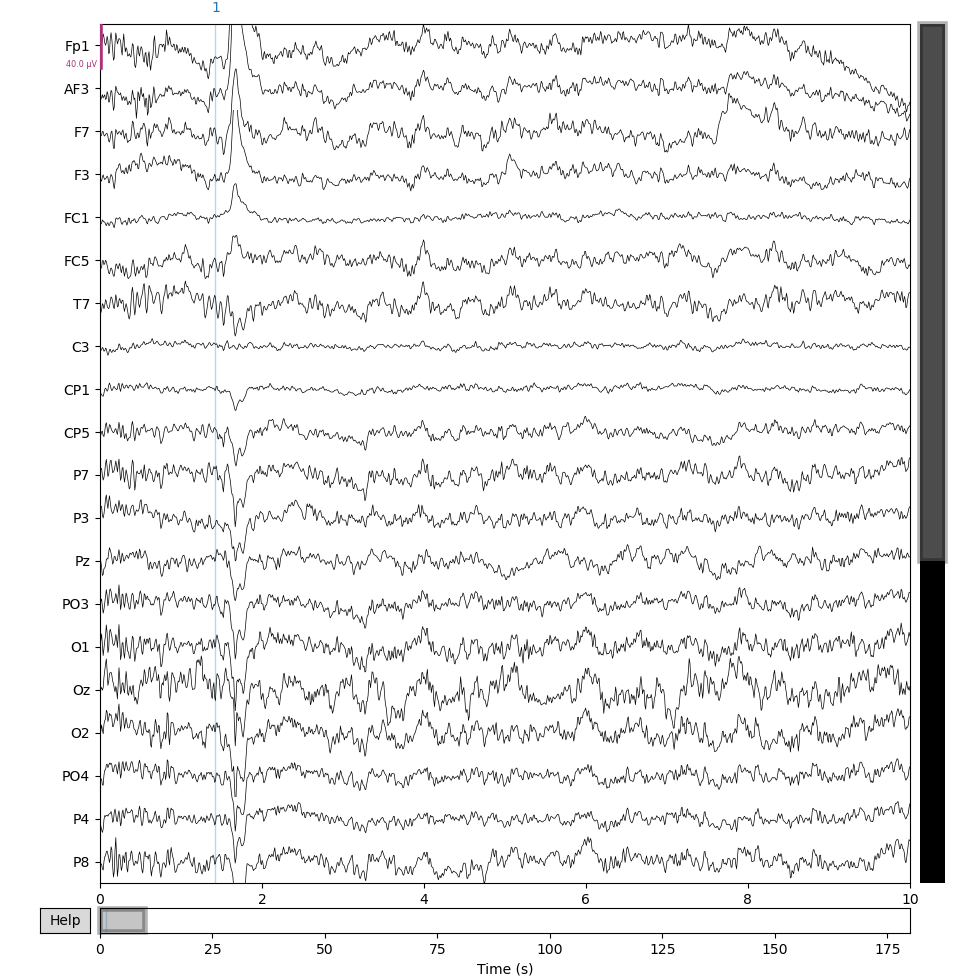

<IPython.core.display.Javascript object>


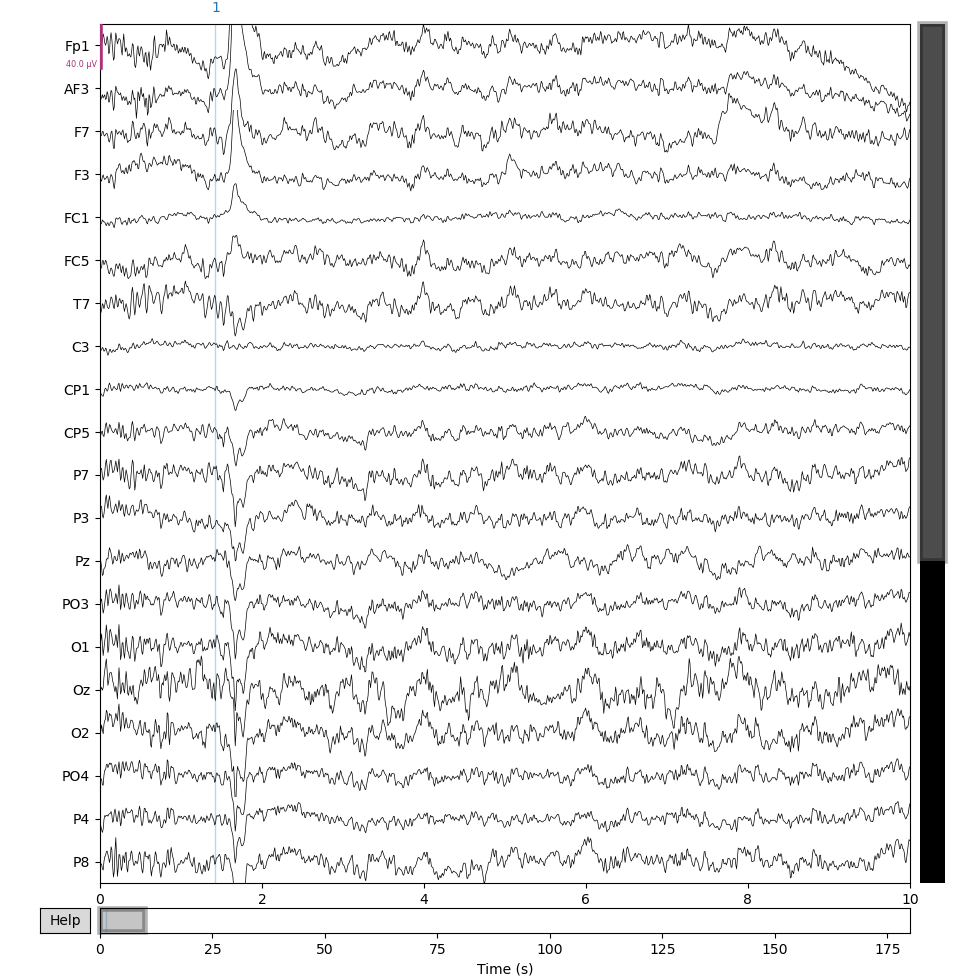

In [7]:
%matplotlib notebook
raw.plot()

Creating a Montage to assign the channels to their position on the subject head, by creating a `Montage`

<IPython.core.display.Javascript object>


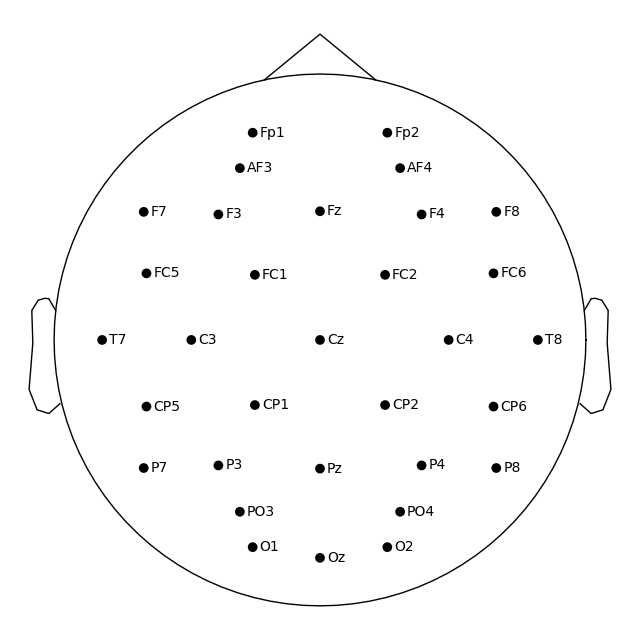

<IPython.core.display.Javascript object>


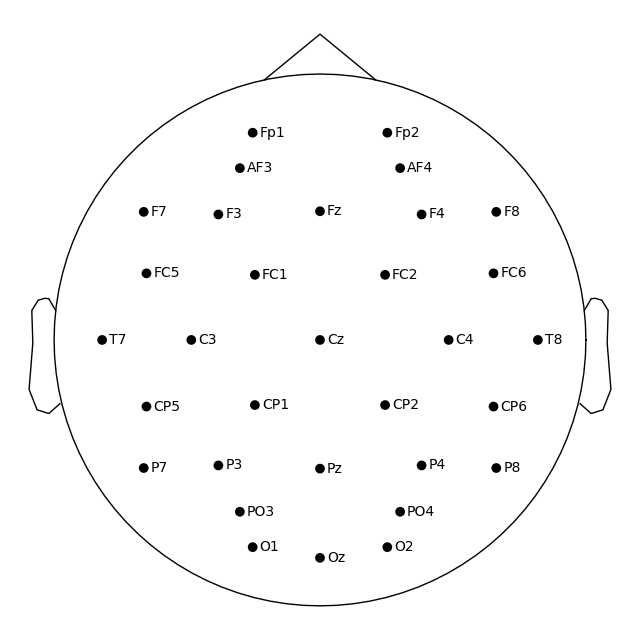

In [8]:

easycap_montage = mne.channels.make_standard_montage('easycap-M1')
raw.set_montage(easycap_montage)
raw.plot_sensors(show_names=True)

## Common Spatial Analysis (CSP) and Feature Extraction<a id="5"></a>
> [Common spatial pattern (CSP)](https://en.wikipedia.org/wiki/Common_spatial_pattern) is a mathematical procedure used in signal processing for separating a multivariate signal into additive subcomponents which have maximum differences in variance between two windows.

In [9]:
from mne.decoding import CSP
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()
labels = epochs.events[:, -1]
y = le.fit_transform(labels)
X = epochs.get_data()


In [11]:
# CSP
csp = CSP(n_components=20, norm_trace=False)
X_out = csp.fit_transform(X,y)

Computing rank from data with rank=None
    Using tolerance 0.0005 (2.2e-16 eps * 32 dim * 7e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00053 (2.2e-16 eps * 32 dim * 7.4e+10  max singular value)
    Estimated rank (mag): 32
    MAG: rank 32 computed from 32 data channels with 0 projectors
Reducing data rank from 32 -> 32
Estimating covariance using EMPIRICAL
Done.


## Model <a id="6"> </a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = X_out.reshape((X_out.shape[0],-1))
scalar = StandardScaler()
X = scalar.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 45)

Closing raw-browser...
Channels marked as bad:
none
Closing raw-browser...
Channels marked as bad:
none


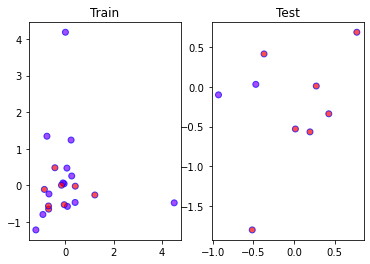

In [14]:
%matplotlib inline

plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(
            X_train[:,0],X_train[:,1],
            c=y_train,cmap='rainbow',
            alpha=0.7,edgecolors='b'
)
plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(
    X_test[:,0],X_test[:,1],
    c=y_test,cmap='rainbow',
    alpha=0.7,edgecolors='b'
)

plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5 )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC =",roc_auc)

ROC = 0.8571428571428572


## References<a id ="8"></a>
[Parkinson’s Disease Detection from Resting-State EEG Signals Using Common Spatial Pattern, Entropy, and Machine Learning Techniques](https://www.mdpi.com/2075-4418/12/5/1033/htm")

[MNE](https://mne.tools/stable/index.html)